## Astronomy example 1
### Downloading images and writing `FITS` files

For examples, documentation, tutorials, etc, see Astropy at http://www.astropy.org



In [1]:
import scipy as sp

import urllib                  # For retrieving an image from a URL

import matplotlib as mpl       # As of July 2017 Bucknell computers use v. 2.x 
import matplotlib.pyplot as plt

# Following is an Ipython magic command that puts figures in the  notebook.
# For figures in separate windows, comment out following line and uncomment
# the next line
# Must come before defaults are changed.
%matplotlib notebook
#%matplotlib

# As of Aug. 2017 reverting to 1.x defaults.
# In 2.x text.ustex requires dvipng, texlive-latex-extra, and texlive-fonts-recommended, 
# which don't seem to be universal
# See https://stackoverflow.com/questions/38906356/error-running-matplotlib-in-latex-type1cm?
mpl.style.use('classic')
        
# M.L. modifications of matplotlib defaults using syntax of v.2.0 
# More info at http://matplotlib.org/2.0.0/users/deflt_style_changes.html
# Changes can also be put in matplotlibrc file, or effected using mpl.rcParams[]
plt.rc('figure', figsize = (6, 4.5))            # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True)             # Adjusts supblot parameters for new size


#import matplotlib.image as mpimg
   
from PIL import Image
from astropy.io import fits
from astropy.utils.data import download_file
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

## Retrieve and display a JPG image

+ Download image from the web, and store it as a local file
+ "Open" the image
+ Determine the size
+ Display

<IPython.core.display.Javascript object>


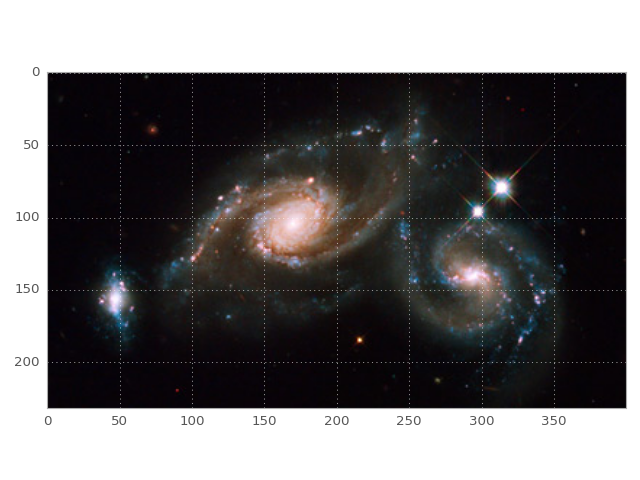

Image size: 400 x 232


In [2]:
urllib.request.urlretrieve('http://www.eg.bucknell.edu/~mligare/Hs-2009-14-a-web.jpg','Hs-2009-14-a-web.jpg')
image = Image.open('Hs-2009-14-a-web.jpg')
xsize, ysize = image.size

plt.figure()
print("Image size: {} x {}".format(xsize, ysize))
plt.grid(color = 'w')
plt.imshow(image);

## Separate colors

In [3]:
r, g, b = image.split()
r_data = sp.array(r.getdata()) # data is now an array of length ysize*xsize
g_data = sp.array(g.getdata())
b_data = sp.array(b.getdata())
print(r_data.shape)


(92800,)


<IPython.core.display.Javascript object>


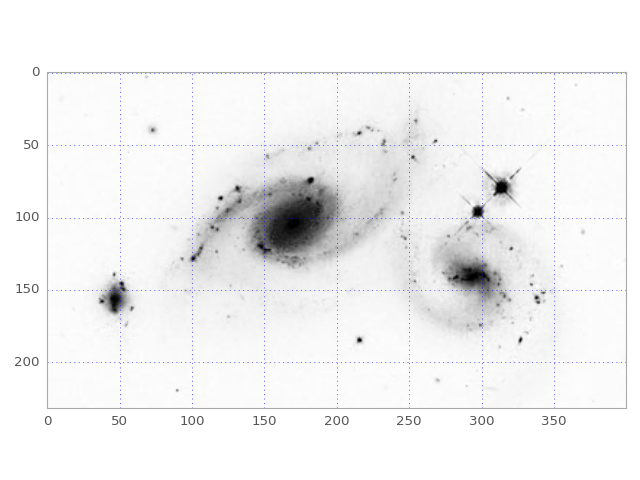

<IPython.core.display.Javascript object>


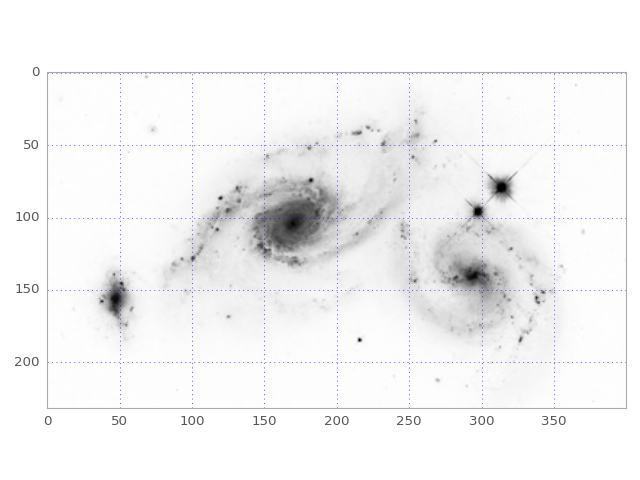

<IPython.core.display.Javascript object>


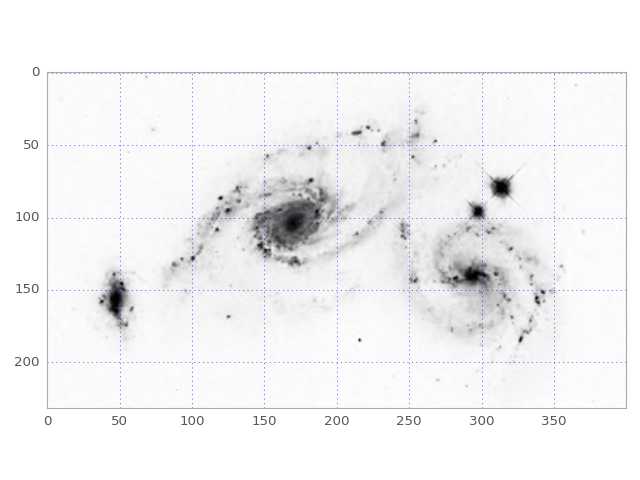

In [4]:
r_data = r_data.reshape(ysize, xsize)
g_data = g_data.reshape(ysize, xsize)
b_data = b_data.reshape(ysize, xsize)

plt.figure()
plt.grid(color = 'b')
plt.imshow(r_data, cmap='Greys');

plt.figure()
plt.grid(color = 'b')
plt.imshow(g_data, cmap='Greys');

plt.figure()
plt.grid(color = 'b')
plt.imshow(b_data, cmap='Greys');

### Write "FITS" files

In [6]:
red = fits.PrimaryHDU(data=r_data)
red.header['LATOBS'] = "32:11:56" # add spurious header info
red.header['LONGOBS'] = "110:56"
red.writeto('red.fits')

green = fits.PrimaryHDU(data=g_data)
green.header['LATOBS'] = "32:11:56"
green.header['LONGOBS'] = "110:56"
green.writeto('green.fits')

blue = fits.PrimaryHDU(data=b_data)
blue.header['LATOBS'] = "32:11:56"
blue.header['LONGOBS'] = "110:56"
blue.writeto('blue.fits')

### Version Information

`version_information` is from J.R. Johansson (jrjohansson at gmail.com)<br>
See Introduction to scientific computing with Python:<br>
http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb <br>
for more information and instructions for package installation.<br>

If `version_information` has been installed system wide (as it has been on linuxremotes), continue with next cell as written.  If not, comment out top line in next cell and uncomment the second line.

In [7]:
%load_ext version_information

#%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py

Loading extensions from ~/.ipython/extensions is deprecated. We recommend managing extensions like any other Python packages, in site-packages.


In [10]:
%version_information scipy, matplotlib, astropy, pillow

Software versions
Python 3.6.1 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython 6.1.0
OS Linux 3.10.0 327.36.3.el7.x86_64 x86_64 with redhat 7.2 Maipo
scipy 0.19.1
matplotlib 2.0.2
astropy 2.0
pillow 4.2.1
Tue Aug 01 14:35:31 2017 EDT